In [2]:
import tensorflow as tf
from tensorflow import keras

# 导入fashion mnist数据集
fashion_mnist = keras.datasets.fashion_mnist
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [3]:
print(f"train_images.shape: {train_images.shape}")
print(f"test_images.shape: {test_images.shape}")
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_labels.shape: {test_labels.shape}")

print(f"train_images[0]: {train_images[0]}")
print(f"train_labels[0]: {train_labels[0]}")

train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)
train_labels.shape: (60000,)
test_labels.shape: (10000,)
train_images[0]: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   

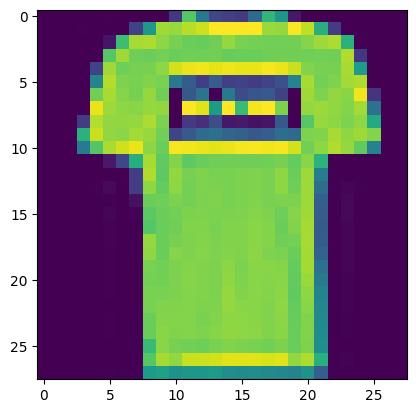

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1])

In [8]:
# 构造神经元
model = keras.Sequential([
    # Flatten层将二维的输入数据转换为一维的输入数据
    keras.layers.Flatten(input_shape=(28, 28)),
    # 隐藏层 256个神经元 每个神经元接受28*28=784个输入 激活函数为relu
    # 神经元的数量决定了模型的复杂度 
    keras.layers.Dense(256, activation='relu'),
    # 输出层 输出10个类别
    keras.layers.Dense(10, activation='softmax')
]) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_images = train_images / 255.0
test_images = test_images / 255.0
model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels)


/Users/raven/Documents/devlop/all_in_ai/ml_learn/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7840 - loss: 0.6147
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3770
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8774 - loss: 0.3334
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8898 - loss: 0.3010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8954 - loss: 0.2829
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8770 - loss: 0.3385


[0.34203410148620605, 0.8776000142097473]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
[1.7400109e-06 2.3298081e-07 1.5414666e-07 4.4084625e-09 2.8117807e-07
 1.2256842e-02 2.1671108e-06 3.0003589e-02 3.2843795e-06 9.5773166e-01]
9


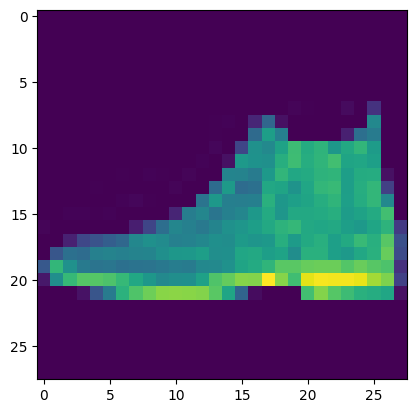

In [9]:

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
plt.imshow(test_images[0])

In [11]:
print(f'model {model.summary()}')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

model None
